This notebook is sectioned by heading. There is a 'Tyler' section and a 'David' section. If we put our stuff in only our own section, we should be able to work on the same notebook with no issues.

Things to investigate:

- How many investments are by doctors who have multiple investments? (Tyler, done)

- Which states / zip codes are associated with the most investments? Does affluence of business zipcode correlate with doctor investment? (David, in progress)

- Which doctors have invested the most money? In the most companies?

- Which investments were made during or prior to 2015? What is the total sum of these different groups of investments?

- Which businesses hold the most investments from doctors? Are they geographically close to each other?

In [9]:
# library imports
import pandas as pd

In [2]:
#     GNRL is 6 gigabytes - too big
# record_general = pd.read_csv('data/OP_DTL_GNRL_PGYR2015_P01172017.csv')
#     RSRCH has hundred of bad columns - not good for class
# record_research = pd.read_csv('data/OP_DTL_RSRCH_PGYR2015_P01172017.csv')
#     REMOVED has very little data, so we're ignoring it for now
# record_removed = pd.read_csv('data/OP_REMOVED_DELETED_PGYR2015_P01172017.csv')

In [10]:
record_ownership = pd.read_csv('data/OP_DTL_OWNRSHP_PGYR2015_P01172017.csv')
record_ownership.shape

(4319, 29)

In [11]:
record_ownership.tail()

,Change_Type,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,Recipient_State,...,Value_of_Interest,Terms_of_Interest,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Dispute_Status_for_Publication,Interest_Held_by_Physician_or_an_Immediate_Family_Member,Payment_Publication_Date
4314,UNCHANGED,202555,Alan,NaN,Glassman,NaN,10 E Central Blvd,NaN,Villa Park,IL,...,16.59,Limited Partnership Interest,"CCPA Purchasing Partners, L.P.",100000010809,"CCPA Purchasing Partners, L.P.",IL,United States,No,Physician Covered Recipient,01/17/2017
4315,UNCHANGED,359778,Inna,NaN,Milgram,NaN,10 E Central Blvd,NaN,Villa Park,IL,...,16.59,Limited Partnership Interest,"CCPA Purchasing Partners, L.P.",100000010809,"CCPA Purchasing Partners, L.P.",IL,United States,No,Physician Covered Recipient,01/17/2017
4316,UNCHANGED,69188,Anthony,NaN,Lin,NaN,10 E Central Blvd,NaN,Villa Park,IL,...,16.59,Limited Partnership Interest,"CCPA Purchasing Partners, L.P.",100000010809,"CCPA Purchasing Partners, L.P.",IL,United States,No,Physician Covered Recipient,01/17/2017
4317,UNCHANGED,1278717,Walter,NaN,Campbell,NaN,2401 Ravine Way,101,Glenview,IL,...,64.11,Limited Partnership Interest,"CCPA Purchasing Partners, L.P.",100000010809,"CCPA Purchasing Partners, L.P.",IL,United States,No,Physician Covered Recipient,01/17/2017
4318,UNCHANGED,1399122,Alexis,NaN,Bond,NaN,455 S. Roselle Road,209,Schaumburg,IL,...,89.40,Limited Partnership Interest,"CCPA Purchasing Partners, L.P.",100000010809,"CCPA Purchasing Partners, L.P.",IL,United States,No,Physician Covered Recipient,01/17/2017


## David: Which states / zip codes are associated with the most investments? Does affluence of business zipcode correlate with doctor investment?

In [9]:
record_ownership.columns.values
len(record_ownership)
#record_ownership['Program_Year'].unique()
#record_ownership['Terms_of_Interest'].head(25)
#record_ownership['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].head(25)
#record_ownership['Interest_Held_by_Physician_or_an_Immediate_Family_Member'].head(25)

4319

In [10]:
temp = record_ownership[['Physician_Profile_ID', 'Recipient_Primary_Business_Street_Address_Line1', 'Recipient_Primary_Business_Street_Address_Line2', 
                             'Recipient_City', 'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country', 'Recipient_Province', 
                             'Recipient_Postal_Code', 'Physician_Primary_Type', 'Physician_Specialty', 'Total_Amount_Invested_USDollars',
                             'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
                             'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
                             'Dispute_Status_for_Publication'
                            ]]

Geography = pd.DataFrame(temp, copy = True)
Geography.head()

,Physician_Profile_ID,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Recipient_Province,Recipient_Postal_Code,Physician_Primary_Type,Physician_Specialty,Total_Amount_Invested_USDollars,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Dispute_Status_for_Publication
0,333118,205 E River Park Circle,Ste 460,Fresno,CA,93720,United States,NaN,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|Surgery,2500.00,WA,United States,No
1,270405,3003 New Hyde Park Rd,Ste 307,New Hyde Park,NY,11042,United States,NaN,NaN,Medical Doctor,Other Service Providers/ Specialist,24999.69,WA,United States,No
2,4927,3003 New Hyde Park Rd,Ste 307,New Hyde Park,NY,11042,United States,NaN,NaN,Medical Doctor,Other Service Providers/ Specialist,99998.74,WA,United States,No
3,132587,5323 Harry Hines Blvd.,NaN,Dallas,TX,75390-9057,United States,NaN,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|Ophthalmology,10000.00,TX,United States,No
4,885629,345 E 80th St,NaN,New York,NY,10075,United States,NaN,NaN,Doctor of Dentistry,Dental Providers|Dentist|Oral and Maxillofacia...,1548787.00,NJ,United States,No


In [11]:
#Geography.groupby('Dispute_Status_for_Publication').count()
Geography['Recipient_Country'].unique()

array(['United States', 'United States Minor Outlying Islands',
       'United Arab Emirates'], dtype=object)

In [12]:
#import urllib
#url = 'https://www.irs.gov/pub/irs-soi/14zpallagi.csv'
#response = urllib.urlopen(url)
#csv = response.read()
#with open('data/Income.csv', 'wb') as f:
#    f.write(csv)
    
#Documentation at https://www.irs.gov/pub/irs-soi/14zpdoc.doc
income = pd.read_csv('data/Income.csv')
income.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,1,850050.0,481840.0,115070.0,240450.0,479900.0,1401930.0,...,389850.0,324575.0,0.0,0.0,0.0,0.0,62690.0,47433.0,744910.0,1964826.0
1,1,AL,0,2,491370.0,200750.0,150290.0,125560.0,281350.0,1016010.0,...,397110.0,950446.0,0.0,0.0,0.0,0.0,70780.0,101969.0,413790.0,1177400.0
2,1,AL,0,3,259540.0,75820.0,142970.0,34070.0,156720.0,589190.0,...,250230.0,1319641.0,0.0,0.0,0.0,0.0,62170.0,132373.0,192050.0,538160.0
3,1,AL,0,4,164840.0,26730.0,125410.0,10390.0,99750.0,423300.0,...,163580.0,1394913.0,0.0,0.0,0.0,0.0,45120.0,124048.0,115470.0,375882.0
4,1,AL,0,5,203650.0,18990.0,177070.0,5860.0,122670.0,565930.0,...,203050.0,3655700.0,610.0,135.0,270.0,66.0,81180.0,387298.0,114380.0,448442.0


In [13]:
income = income[['STATE', 'zipcode', 'agi_stub', 'N1']]
income = income[income['zipcode'] != 0]
income['zipcode'] = income['zipcode'].apply('{:0>5}'.format)
income['N2'] = income['agi_stub'] * income['N1']
income.head()

,STATE,zipcode,agi_stub,N1,N2
6,AL,35004,1,1510.0,1510.0
7,AL,35004,2,1280.0,2560.0
8,AL,35004,3,920.0,2760.0
9,AL,35004,4,630.0,2520.0
10,AL,35004,5,590.0,2950.0


In [14]:
Geography['Recipient_Zip_Code'] = Geography['Recipient_Zip_Code'].apply(lambda s: str(s).split('-')[0]) #.str.split('-')
Geography.rename(columns={'Recipient_Zip_Code': 'zipcode'}, inplace=True)
Geography.head()

,Physician_Profile_ID,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,Recipient_State,zipcode,Recipient_Country,Recipient_Province,Recipient_Postal_Code,Physician_Primary_Type,Physician_Specialty,Total_Amount_Invested_USDollars,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Dispute_Status_for_Publication
0,333118,205 E River Park Circle,Ste 460,Fresno,CA,93720,United States,NaN,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|Surgery,2500.00,WA,United States,No
1,270405,3003 New Hyde Park Rd,Ste 307,New Hyde Park,NY,11042,United States,NaN,NaN,Medical Doctor,Other Service Providers/ Specialist,24999.69,WA,United States,No
2,4927,3003 New Hyde Park Rd,Ste 307,New Hyde Park,NY,11042,United States,NaN,NaN,Medical Doctor,Other Service Providers/ Specialist,99998.74,WA,United States,No
3,132587,5323 Harry Hines Blvd.,NaN,Dallas,TX,75390,United States,NaN,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|Ophthalmology,10000.00,TX,United States,No
4,885629,345 E 80th St,NaN,New York,NY,10075,United States,NaN,NaN,Doctor of Dentistry,Dental Providers|Dentist|Oral and Maxillofacia...,1548787.00,NJ,United States,No


In [15]:
wtmeaninc = income.groupby(['zipcode']).mean()
wtmeaninc = wtmeaninc['N2']/wtmeaninc['N1']
wtmeaninc.head()
#is weighted mean income by zip

zipcode
01001    2.515766
01002    2.761411
01005    2.631579
01007    2.821380
01008    2.718750
dtype: float64

In [16]:
totalinv = Geography.groupby(['zipcode']).sum()['Total_Amount_Invested_USDollars']
#Combine = pd.merge(income, Geography, how='outer', on='zipcode')
#income.head()
totalinv.head()

zipcode
00907     50000.0
00909     50000.0
00969    150000.0
01104      3000.0
01532      9900.0
Name: Total_Amount_Invested_USDollars, dtype: float64

In [17]:
numdocs = Geography.groupby(['zipcode']).count()['Total_Amount_Invested_USDollars']
numdocs.head()

zipcode
00907    1
00909    1
00969    1
01104    1
01532    1
Name: Total_Amount_Invested_USDollars, dtype: int64

In [18]:
combined = pd.concat([wtmeaninc, totalinv, numdocs], axis=1).dropna()
combined.columns = ['WeightedMeanIncomeBracket', 'TotalInvestedUSD', 'NumberOfDoctors']
combined.head()

,WeightedMeanIncomeBracket,TotalInvestedUSD,NumberOfDoctors
01104,1.832669,3000.0,1.0
01532,3.238462,9900.0,1.0
01604,2.204253,10000.0,2.0
01605,2.091301,30000.0,1.0
01824,3.196483,8000.0,1.0


In [19]:
combined.astype(float, inplace = True)
combined['PerDrInvest'] = combined['TotalInvestedUSD']/combined['NumberOfDoctors']
combined.head()

,WeightedMeanIncomeBracket,TotalInvestedUSD,NumberOfDoctors,PerDrInvest
01104,1.832669,3000.0,1.0,3000.0
01532,3.238462,9900.0,1.0,9900.0
01604,2.204253,10000.0,2.0,5000.0
01605,2.091301,30000.0,1.0,30000.0
01824,3.196483,8000.0,1.0,8000.0


In [23]:
#combined['WeightedMeanIncomeBracket'].head()
#import scipy
from scipy import stats
stats.normaltest(combined['WeightedMeanIncomeBracket'])

NormaltestResult(statistic=41.641190894534866, pvalue=9.0725691560111839e-10)

In [24]:
stats.normaltest(combined['PerDrInvest'])

NormaltestResult(statistic=3883.4213925528334, pvalue=0.0)

In [26]:
stats.spearmanr(combined['WeightedMeanIncomeBracket'], combined['PerDrInvest'], axis=0)

SpearmanrResult(correlation=0.037739967332294407, pvalue=0.16531799247485487)

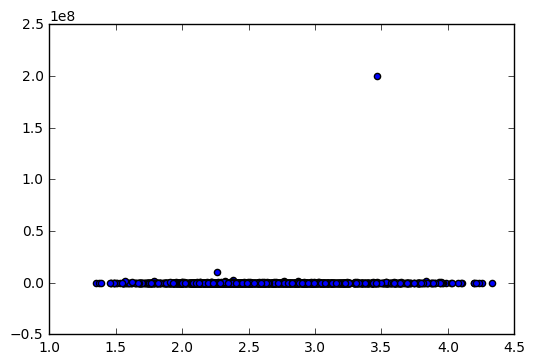

In [27]:
import matplotlib.pyplot
import pylab

matplotlib.pyplot.scatter(combined['WeightedMeanIncomeBracket'],combined['PerDrInvest'])

matplotlib.pyplot.show()

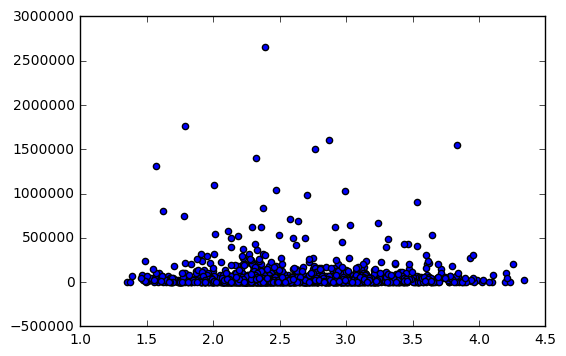

In [29]:
outlier = combined['TotalInvestedUSD'].argmax()
combined.drop(combined['TotalInvestedUSD'].argmax(), inplace = True)
combined.drop(combined['TotalInvestedUSD'].argmax(), inplace = True)
matplotlib.pyplot.scatter(combined['WeightedMeanIncomeBracket'],combined['PerDrInvest'])
matplotlib.pyplot.show()

In [32]:
stats.spearmanr(combined['WeightedMeanIncomeBracket'], combined['PerDrInvest'], axis=0)

SpearmanrResult(correlation=0.037179598648737551, pvalue=0.17216748192372278)